In [41]:
from __future__ import print_function
from __future__ import division
import MySQLdb
import sys
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

In [42]:
pwd = """|T0<n'jM"I<,"""
db_connection = MySQLdb.connect(host="db-ro.precog.hubteam.com",
                           user="app_precog",
                           passwd=pwd)
c = db_connection.cursor()

In [43]:
query = """
SELECT * 
FROM Precog.healthScore
ORDER BY numSends DESC
"""

In [44]:
# Get data from database
try:
    c.execute(query)
    rows = c.fetchall()
except MySQLdb.Error, e:
    try:
        print("MySQL Error [%d]: %s" % (e.args[0], e.args[1]))
    except IndexError:
        print("MySQL Error: %s" % str(e))

# Use pandas to read it into a dataframe
df = pd.read_sql(query, con=db_connection)

In [45]:
# # input csv file
# top1000 = pd.read_csv('Feb2018top1000Senders.csv')

In [49]:
# Thresholds
t_unsubscribePerOpenRatio = 3.5
t_numSends = 1000000

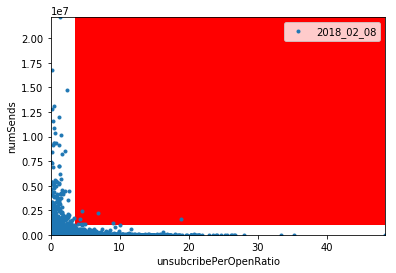

In [50]:
# unsubscribesPerOpenRatio as x axis and volume as y
# Top right corner are the biggest spammers on our network
# isolate the outliers in the top right
# portals with the least distance away from the coordinates = d.unsub.max(),d.numSends.max() (top right corner)

plt.plot(df.unsubscribePerOpenRatio, df.numSends, '.')
plt.xlim((0,max(df.unsubscribePerOpenRatio)))
plt.ylim((0,max(df.numSends)))

plt.xlabel('unsubcribePerOpenRatio')
plt.ylabel('numSends')
plt.legend(['2018_02_08'])

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((t_unsubscribePerOpenRatio, t_numSends), max(df.unsubscribePerOpenRatio), (max(df.numSends) - t_numSends), facecolor="red"))

In [51]:
# Biggest spammers

# on shared IP's
# ix_shared = top1000.ip = 404

# over X sends
ix_numSends = df.numSends >= t_numSends

# unsub/open rate > X
ix_unsubscribePerOpenRatio = df.unsubscribePerOpenRatio >= t_unsubscribePerOpenRatio

# build table
df[ix_numSends & ix_unsubscribePerOpenRatio].shape
biggest_spammers = df[ix_numSends & ix_unsubscribePerOpenRatio]
biggest_spammers.sort_values('unsubscribePerOpenRatio', ascending='False')

,portalId,lastScoredAt,overallScore,clickThroughRatio,clickThroughScore,openRatio,openScore,unsubscribePerOpenRatio,unsubscribePerOpenScore,hardBounceRatio,hardBounceScore,numSends
208,3316363,1521766936747,21,5.424829,20.0,10.433038,6.0,3.945804,19.0,0.864337,39.0,1116000
147,3815279,1521766937257,35,5.924743,22.0,11.442959,8.0,4.295233,16.0,0.112589,92.0,1596957
204,513577,1521766932956,30,3.464046,10.0,6.953384,2.0,4.391329,16.0,0.146105,90.0,1147801
217,2104377,1521766934332,33,2.789239,8.0,13.671179,13.0,4.577721,15.0,0.058401,95.5,1041072
92,4004260,1521766937261,27,1.386174,3.0,4.475237,1.0,4.618377,14.0,0.156250,89.5,2456958
207,476937,1521766932491,12,5.037602,18.0,9.175439,5.0,4.626558,14.0,3.201894,9.0,1122773
214,453289,1521766932488,42,8.459071,49.0,16.944917,22.0,4.990311,12.0,0.245762,84.0,1083567
99,3219216,1521766936309,8,4.023602,13.0,6.106387,2.0,6.886730,5.0,2.976897,10.0,2247945
200,2618643,1521766935265,15,1.894176,5.0,2.783071,1.0,9.000625,2.0,0.698862,51.0,1205389
142,3468137,1517447185358,4,1.566187,5.0,8.967929,4.0,18.932704,0.0,3.651847,8.0,1645058
